In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy.signal import butter, lfilter,freqs,filtfilt,sosfilt,sosfiltfilt

In [6]:
katnp = np.genfromtxt('KATNP.accel.e.txt')
t = katnp[:,0]
accel = katnp[:,1]

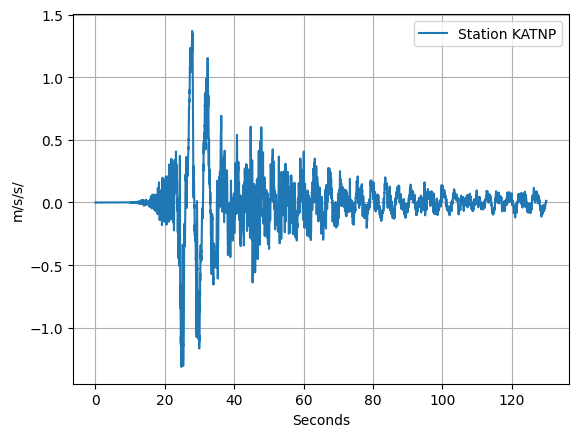

In [7]:
plt.figure()
plt.plot(t,accel,label='Station KATNP')
plt.xlabel('Seconds')
plt.ylabel('m/s/s/')
plt.grid()
plt.legend()

## Lesdo the spectraaaa

In [11]:
# Sampling parameters
sampling_rate = 1/(t[1]-t[0])  # Sampling rate in Hz
N = len(accel)  # Number of samples in the signal

# Compute the FFT
Faccel = fft(accel)
freq = np.fft.fftfreq(N, d=1/sampling_rate)

#Keep only positive frequencies
i = np.where(freq>=0)[0]
freq = freq[i]
Faccel = Faccel[i]*2

# Apply fftshift to reorder the FFT output and frequencies for visualization
#A = fftshift(A)
#freq = fftshift(freq)

dt = t[1] - t[0]

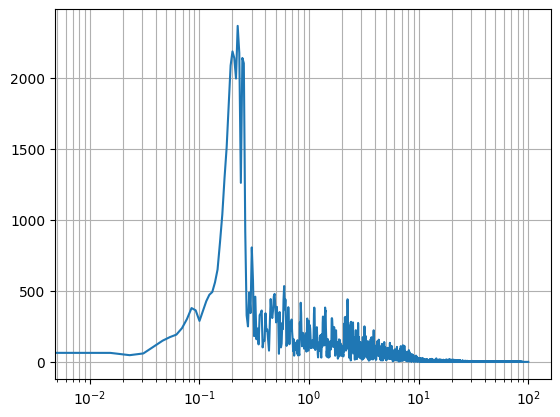

In [12]:
plt.figure()
plt.semilogx(freq,abs(Faccel))
plt.grid(which='both')

In [70]:
# Build a butterworth filter
# fnyquist = sampling_rate/2
nyquist_freq = 1 / (2 * dt)
fc = 0.4
fc_normalized = fc/nyquist_freq
poles = 6
b, a = signal.butter(poles, fc_normalized, 'lowpass', analog=False)

# fc = np.array([0.1, 0.4])
# fc_normalized = fc/nyquist_freq
# poles = 2
# b, a = signal.butter(poles, fc_normalized, 'bandpass', analog=False)

#get the frequency response
# h = filter gain
w, h = signal.freqz(b, a,worN=2**13)
#Convert from angular to linear frequency
f = (w) / (np.pi)
f = f*nyquist_freq

accel_filt = lfilter(b, a, accel)
accel_filt2 = filtfilt(b, a, accel)

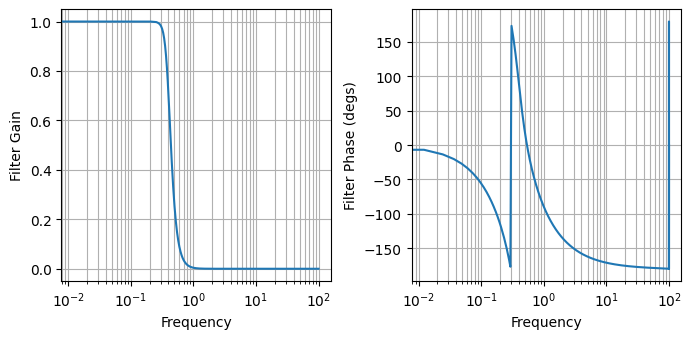

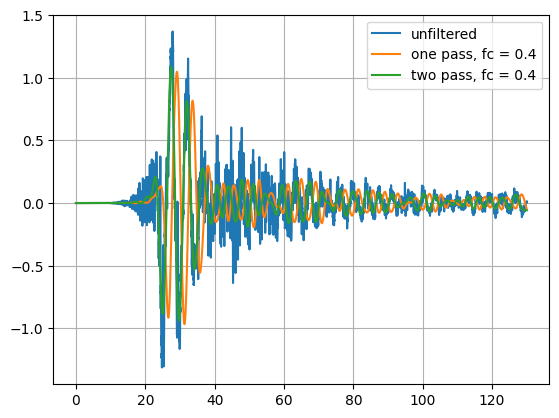

In [71]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.semilogx(f,abs(h))
plt.grid(which='both')
plt.xlabel('Frequency')
plt.ylabel('Filter Gain')

plt.subplot(1,2,2)
plt.semilogx(f,np.angle(h)*(180/np.pi))
plt.grid(which='both')
plt.xlabel('Frequency')
plt.ylabel('Filter Phase (degs)')

plt.subplots_adjust(wspace=0.3,bottom=0.2)


plt.figure()
plt.plot(time,accel,label='unfiltered')
plt.plot(time,accel_filt,label=r'one pass, fc = %s' % fc)
plt.plot(time,accel_filt2,label=r'two pass, fc = %s' % fc)
plt.legend()
plt.grid()

In [43]:
# Build a filter
fnyquist = sampling_rate/2
fc = np.array([0.5])
fc_normalized = np.array([0.3, 0.7])/fnyquist
poles = 20
sos = signal.butter(poles, fc_normalized, 'bandpass', output='sos')
fc_normalized = fc / fnyquist
sos = signal.butter(poles, fc_normalized, 'highpass', output='sos')

#get the frequency response
w, h = signal.sosfreqz(sos,worN=4096)
#Convert from angular to linear frequency
f = (w) / (np.pi)
f = f*fnyquist

accel_filt = sosfilt(sos, accel)
accel_filt2 = sosfiltfilt(sos, accel)


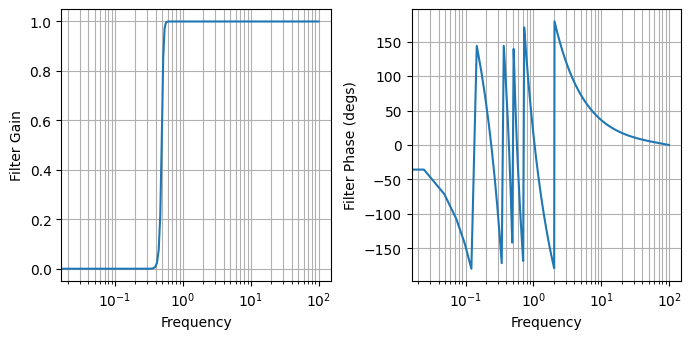

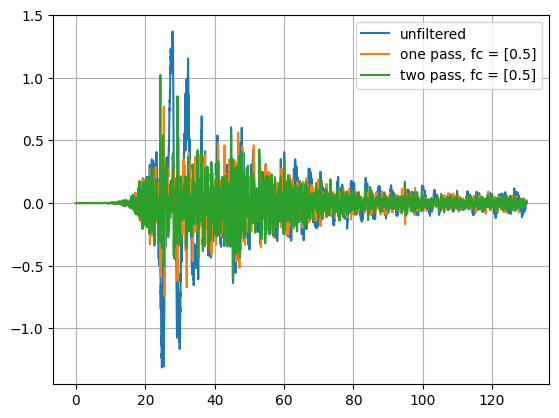

In [44]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.semilogx(f,abs(h))
plt.grid(which='both')
plt.xlabel('Frequency')
plt.ylabel('Filter Gain')

plt.subplot(1,2,2)
plt.semilogx(f,np.angle(h)*(180/np.pi))
plt.grid(which='both')
plt.xlabel('Frequency')
plt.ylabel('Filter Phase (degs)')

plt.subplots_adjust(wspace=0.3,bottom=0.2)


plt.figure()
plt.plot(time,accel,label='unfiltered')
plt.plot(time,accel_filt,label=r'one pass, fc = %s' % fc)
plt.plot(time,accel_filt2,label=r'two pass, fc = %s' % fc)
plt.legend()
plt.grid()

### Final piece, visualize a spectrogram

In [122]:
nperseg = 1024
noverlap = 1000
F, T, Sxx = signal.spectrogram(accel, sampling_rate,nperseg=nperseg,noverlap=noverlap)


(0.0, 80.0)

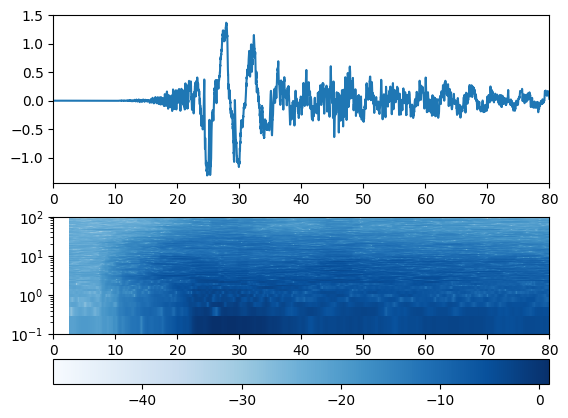

In [134]:
plt.figure()
plt.subplot(2,1,2)
ax = plt.gca()
ax.set_yscale('log')
plt.pcolormesh(T,F,np.log(Sxx),cmap='Blues')
plt.colorbar(orientation='horizontal')
plt.ylim([0.1,fnyquist])
plt.xlim([0,80])

plt.subplot(2,1,1)
plt.plot(time,accel)
plt.xlim([0,80])